# Kaggle 2018 Survey Analysis

## Overview
This workbook contains an exploratory data analysis of the Kaggle 2018 Survey data (originally downloaded from https://www.kaggle.com/kaggle/kaggle-survey-2018/)

In [83]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pixiedust

# magic word for producing visualizations in notebook
%matplotlib inline

# magic for pixiedebugger

# magic for autocomplete
%config IPCompleter.greedy=True


## Load data and initial overview of data set
The data set contains three files. For this analysis we will only use the file 'multipleChoiceResponses.csv'.

In [2]:
df = pd.read_csv('data\multipleChoiceResponses.csv')

C:\Users\Lindstaedt\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: object(395)
memory usage: 71.9+ MB


In [4]:
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


#### row zero contains the questions - drop this from the dataframe and store it separately:

In [5]:
dfQuestions = df.loc[0,:].copy()

In [6]:
df.drop([0], inplace = True)

In [7]:
dfQuestions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Q5                                     Which best describes your undergraduate major?...
Q6                                     Select the title most similar to your current ...
Q6_OTHER_TEXT                          Select the title most similar to your current ...
Q7                                     In what industry is your current employer/cont...
Q7_OTHER_TEXT                          In what industry is your current employer/cont...
Q8                   

## Question 1: What are some of the demographics of the survey respondents?

In [8]:
df.describe()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
count,23859,23859,23859,23859,23859,23438,22947,22900,23859,21685,...,23859,1371,6478,2674,2104,3569,1059,2500,520,23859
unique,7641,4,69,12,58,7,13,21,900,19,...,171,1,1,1,1,1,1,1,1,414
top,142,Male,-1,25-29,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,Computers/Technology,...,-1,Too expensive,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,None of these reasons apply to me,Other,-1
freq,31,19430,21738,6159,4716,10855,9430,5253,20603,5584,...,21658,1371,6478,2674,2104,3569,1059,2500,520,21421


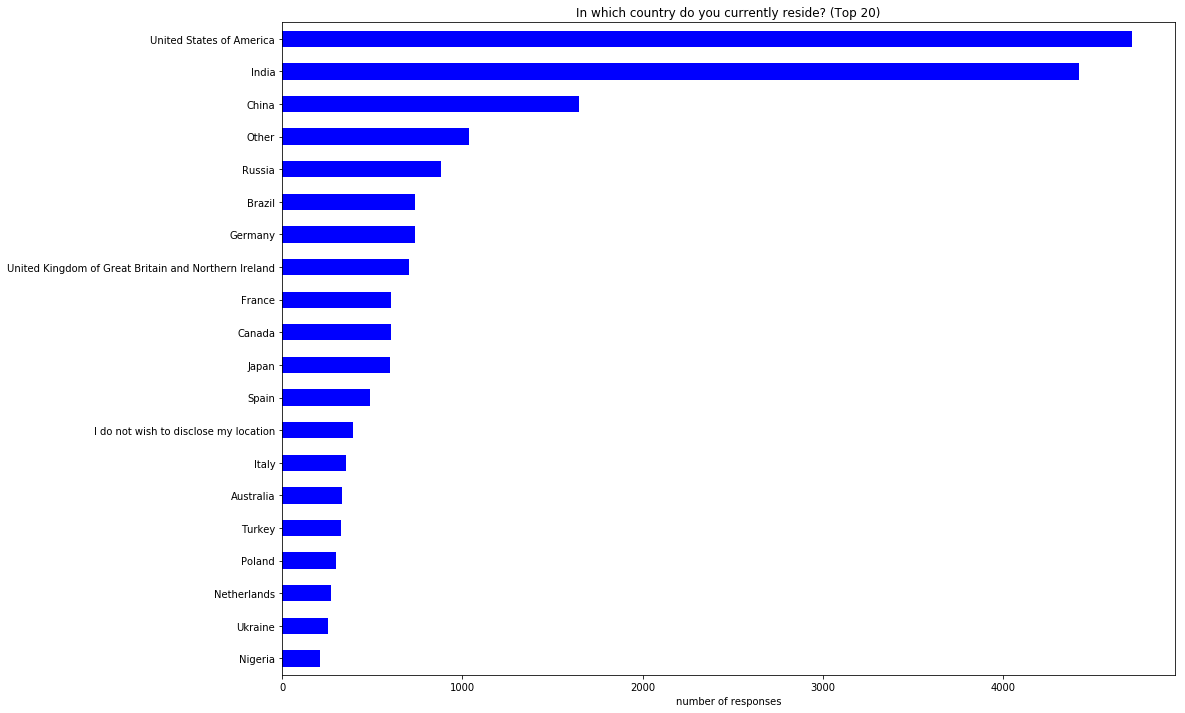

In [98]:
topx = 20 # use zero to show all or number. eg topx =10 for top 10

ax = df.Q3.value_counts(ascending=True)[-topx:].plot(kind = 'barh', color = 'blue')
ax.set_title(dfQuestions.Q3 + ' (Top ' + str(topx) + ')')
ax.set_xlabel('number of responses')
plt.rcParams['figure.figsize'] = [16,12]
plt.savefig('img-top20-countries.jpg')
plt.show()

#### Most survey answers came from the US, India, and China - let's look into gender and age distributions in those countries:

In [92]:
df_top3_countries = df[(df.Q3 == 'United States of America') | (df.Q3 == 'India') | (df.Q3 == 'China')]

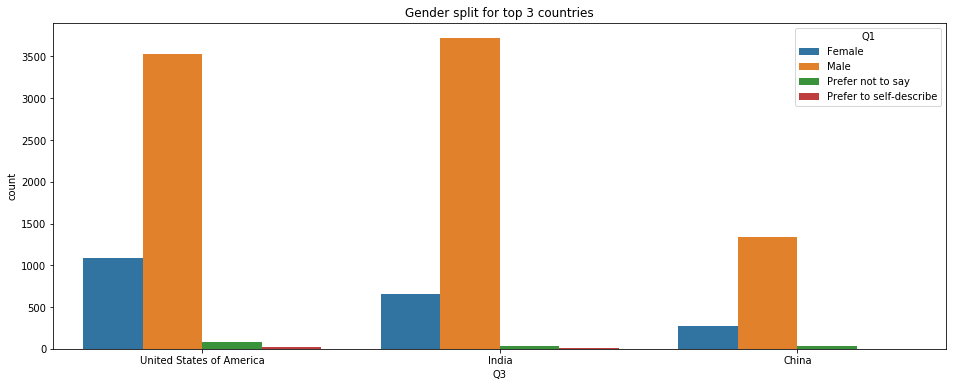

In [104]:
sns.countplot(data = df_top3_countries, x = 'Q3', hue= 'Q1')
plt.title('Gender split for top 3 countries')
plt.rcParams['figure.figsize'] = [16,6]
plt.savefig('img-top3-countries-gendersplit.jpg')
plt.show()

In [126]:
# counts by country
df_top3_countries.groupby(['Q3'])['Q1'].count()

Q3
China                       1644
India                       4417
United States of America    4716
Name: Q1, dtype: int64

In [127]:
# counts by country and gender
df_top3_countries.groupby(['Q3'])['Q1'].value_counts()

Q3                        Q1                     
China                     Male                       1337
                          Female                      267
                          Prefer not to say            38
                          Prefer to self-describe       2
India                     Male                       3719
                          Female                      657
                          Prefer not to say            37
                          Prefer to self-describe       4
United States of America  Male                       3530
                          Female                     1082
                          Prefer not to say            77
                          Prefer to self-describe      27
Name: Q1, dtype: int64

In [130]:
# percentages by country by gender
100.00 * df_top3_countries.groupby(['Q3', 'Q1'])['Q1'].count() / df_top3_countries.groupby(['Q3'])['Q1'].count()

Q3                        Q1                     
China                     Female                     16.240876
                          Male                       81.326034
                          Prefer not to say           2.311436
                          Prefer to self-describe     0.121655
India                     Female                     14.874349
                          Male                       84.197419
                          Prefer not to say           0.837673
                          Prefer to self-describe     0.090559
United States of America  Female                     22.943172
                          Male                       74.851569
                          Prefer not to say           1.632740
                          Prefer to self-describe     0.572519
Name: Q1, dtype: float64

#### The US has a higher percentage of female respondents than China and India

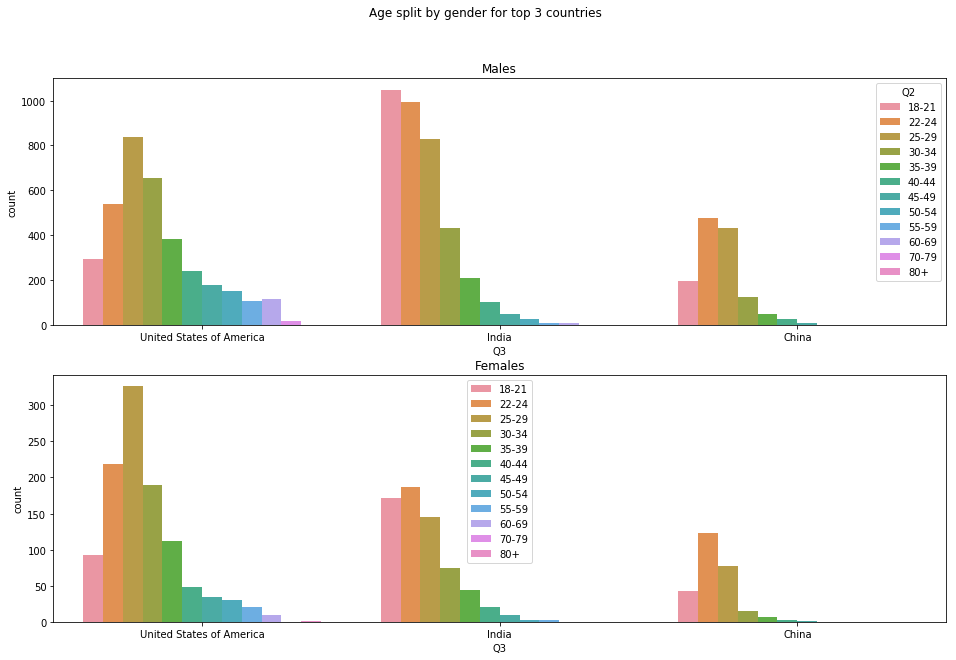

In [175]:
# sorting the age categories for the count plot
sorted_age_groups = sorted(df_top3_countries.Q2.value_counts().index)

fig, ax = plt.subplots(2, 1, figsize=(16,10))
fig.suptitle('Age split by gender for top 3 countries')

ax[0].set_title('Males')
sns.countplot(data = df_top3_countries[df_top3_countries.Q1 == 'Male'], 
              x = 'Q3',
              order = ['United States of America', 'India', 'China'],
              hue= 'Q2',
              hue_order = sorted_age_groups,
              ax = ax[0])


ax[1].set_title('Females')
sns.countplot(data = df_top3_countries[df_top3_countries.Q1 == 'Female'], 
              x = 'Q3',
              order = ['United States of America', 'India', 'China'],
              hue= 'Q2',
              hue_order = sorted_age_groups,
              ax = ax[1])

plt.legend(loc='best')
plt.rcParams['figure.figsize'] = [16,6]
plt.savefig('img-top3-countries-agesplit.jpg')
plt.show()

#### The survey participants from India are much younger than those from the US or China. Especially, young males are overrepresented.